## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





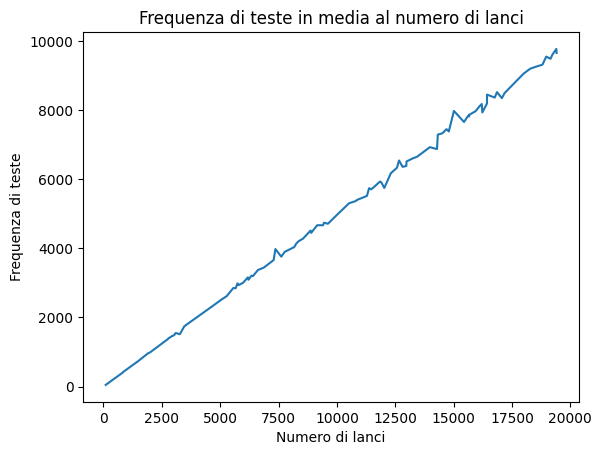

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def freq_testa (n):
    sum = 0
    for i in range (0, n+1):
        lancio = np.random.randint(0,2)
        sum = sum + lancio
    freq_teste = (sum/n)*100
    return freq_teste

lista_freq = []
lista_lanci = []
for i in range (0, 101):
    n_lanci = np.random.randint(10, 20001)
    lista_lanci.append(n_lanci)
    lista_freq.append(freq_testa(n_lanci))


lista_lanci = pd.Series(lista_lanci).sort_values()  
lista_freq = np.array(lista_freq)  
n_medio_teste = lista_freq*np.array(lista_lanci)/100

plt.plot(lista_lanci, n_medio_teste)
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza di teste')
plt.title('Frequenza di teste in media al numero di lanci')
plt.show()

    


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

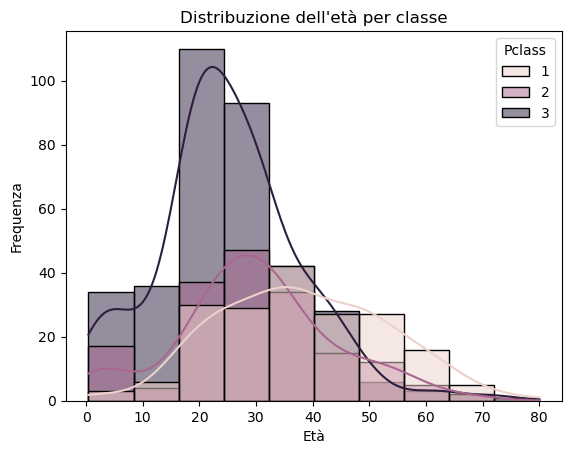

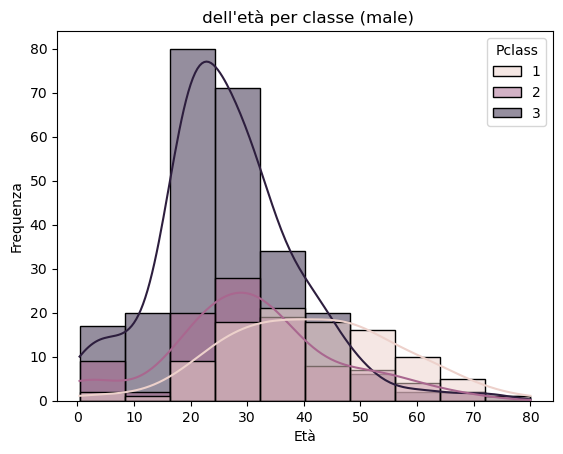

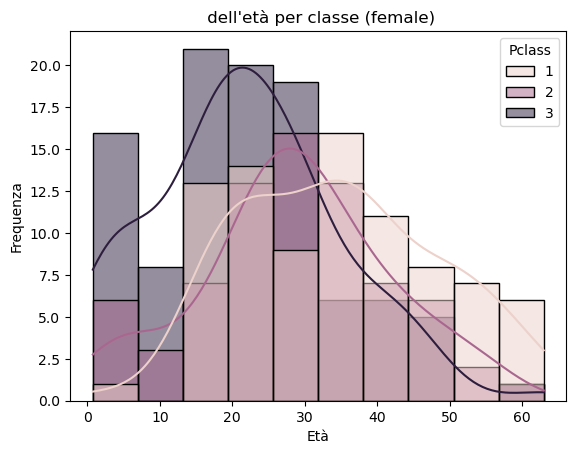

In [7]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.shape

df.isna().sum()

df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Age"].dropna()

df.duplicated().sum() #non ci sono righe doppie

df.groupby("Pclass")["Age"].mean()
df["Age"].fillna(df["Age"].mean())

sns.histplot(data=df, x="Age", hue="Pclass", bins=10, kde=True)
plt.title("Distribuzione dell\'età per classe")
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show()

genders = df["Sex"].unique()
for gende in  genders:
    gen = df[df["Sex"] == gende]
    sns.histplot(data=gen, x="Age", hue="Pclass", bins=10, kde=True)
    plt.title(" dell\'età per classe ({})".format(gende))
    plt.xlabel("Età")
    plt.ylabel("Frequenza")
    plt.show()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

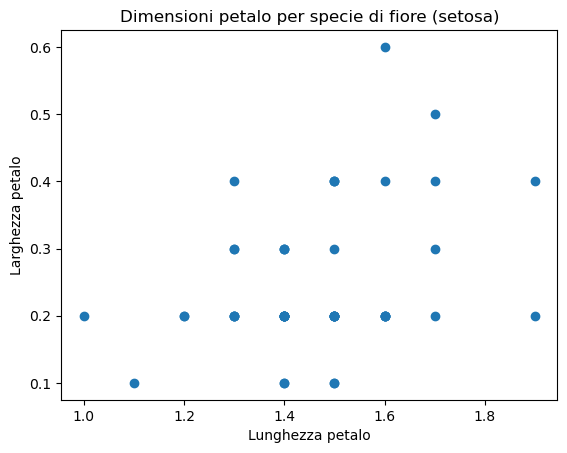

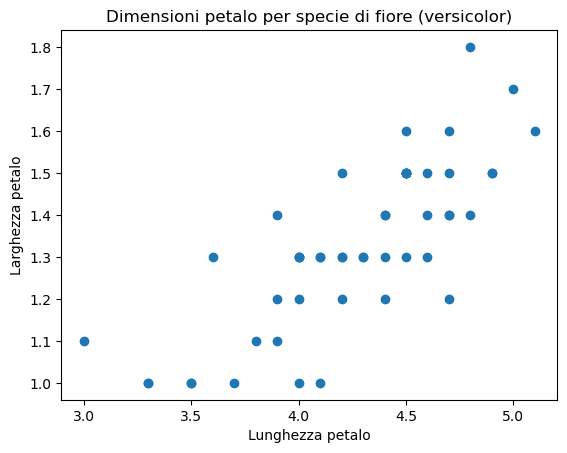

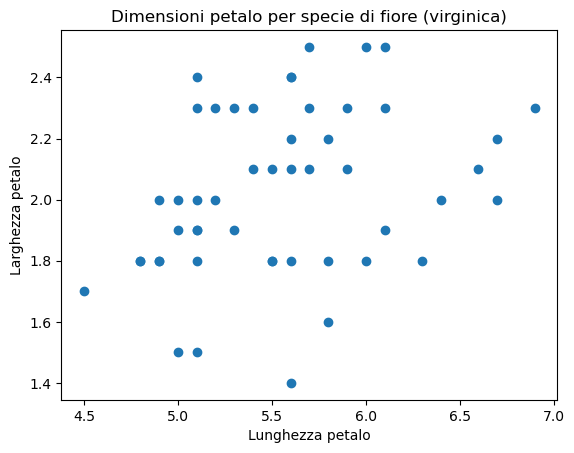

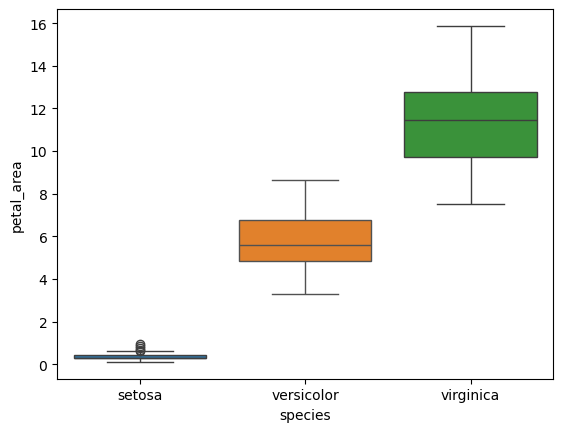

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

df["species"].value_counts()

df.groupby("species")["petal_length"].mean()
df.groupby("species")["petal_width"].mean()

specie = df["species"].unique()
for spec in  specie:
    dati_specie = df[df["species"] == spec]
    plt.scatter(dati_specie["petal_length"], dati_specie["petal_width"])
    plt.title("Dimensioni petalo per specie di fiore ({})".format(spec))
    plt.xlabel("Lunghezza petalo")
    plt.ylabel("Larghezza petalo")
    plt.show()

df["petal_area"] = df["petal_length"] * df["petal_width"]
#df.head()
df["petal_area"].describe()

for spec in  specie:
    dati_specie = df[df["species"] == spec] 
    sns.boxplot(x = "species", y="petal_area", data = dati_specie)



